In [43]:
%run BankPreprocess.ipynb

C:\Users\88690\AppData\Local\Temp\ipykernel_47332\3447305422.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col] = num_df[col].replace(-1, pd.NA)
C:\Users\88690\AppData\Local\Temp\ipykernel_47332\3447305422.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col] = num_df[col].fillna(base_df[col].mean())


In [45]:
raw_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [104]:
raw_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
 
y_c = raw_df['balance']
raw_df_c = raw_df.drop('balance', axis=1)

# Assuming raw_df is your entire DataFrame and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(raw_df_c, y_c, test_size=0.2, random_state=42)

# Identify categorical and numerical columns from the training set
categorical_cols_r = X_train.select_dtypes(include=['object']).columns
numerical_cols_r = X_train.select_dtypes(exclude=['object']).columns

# Preprocessing setup
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_cols_r),
        ('num', 'passthrough', numerical_cols_r) 
    ])

# Creating the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(max_depth=30))
])
# DecisionTreeRegressor / DecisionTreeClassifier
# Fit the model only on the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions on the test data using the pipeline
y_pred = pipeline.predict(X_test)

# Extract the classifier from the pipeline for visualization
tree_clf = pipeline.named_steps['classifier']

# Calculate and print the accuracy score
classifier_score = pipeline.score(X_test, y_test)  # Use the pipeline directly
print('The classifier accuracy score is {:03.6f}'.format(classifier_score))

# Plot the decision tree
plt.figure(figsize=(12, 8))  # You can adjust the figure size
plot_tree(tree_clf, filled=True, 
          feature_names=numerical_cols_r.tolist() + categorical_cols_r.tolist())
plt.title("Decision Tree Visualization")
plt.show()

The classifier accuracy score is -1.298523


In [ ]:
# Get the names of features after preprocessing
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Print branch information with original feature names
for node_id in range(tree.node_count):
    if tree.children_left[node_id] != tree.children_right[node_id]:  # split node
        feature_index = tree.feature[node_id]
        print(f"Node {node_id}:")
        print(f" - Split feature: {feature_names[feature_index]}")  # feature name
        print(f" - Threshold: {tree.threshold[node_id]}")
        print(f" - Left child: {tree.children_left[node_id]}")
        print(f" - Right child: {tree.children_right[node_id]}")
    else:  # leaf node
        print(f"Leaf Node {node_id}:")
        print(f" - Value: {tree.value[node_id]}")

The classifier accuracy score is 0.892514


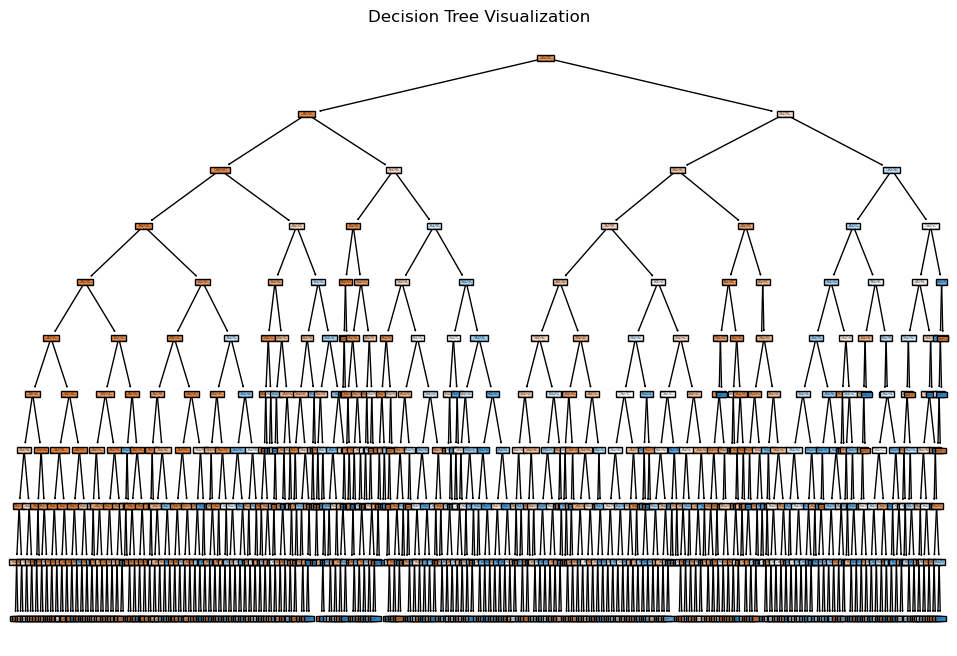

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
 
y_r = raw_df['y']
raw_df_r = raw_df.drop('y', axis=1)

# Assuming raw_df is your entire DataFrame and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(raw_df_r, y_r, test_size=0.2, random_state=42)

# Identify categorical and numerical columns from the training set
categorical_cols_r = X_train.select_dtypes(include=['object']).columns
numerical_cols_r = X_train.select_dtypes(exclude=['object']).columns

# Preprocessing setup
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_cols_r),
        ('num', 'passthrough', numerical_cols_r) 
    ])

# Creating the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10))
])
# DecisionTreeRegressor / DecisionTreeClassifier
# Fit the model only on the training data
pipeline.fit(X_train, y_train)

# Now, you can make predictions on the test data using the pipeline
y_pred = pipeline.predict(X_test)

# Extract the classifier from the pipeline for visualization
tree_clf = pipeline.named_steps['classifier']

# Calculate and print the accuracy score
classifier_score = pipeline.score(X_test, y_test)  # Use the pipeline directly
print('The classifier accuracy score is {:03.6f}'.format(classifier_score))

# Plot the decision tree
plt.figure(figsize=(12, 8))  # You can adjust the figure size
plot_tree(tree_clf, filled=True, 
          feature_names=numerical_cols_r.tolist() + categorical_cols_r.tolist())
plt.title("Decision Tree Visualization")
plt.show()

In [40]:
# Get the names of features after preprocessing
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Print branch information with original feature names
for node_id in range(tree.node_count):
    if tree.children_left[node_id] != tree.children_right[node_id]:  # split node
        feature_index = tree.feature[node_id]
        print(f"Node {node_id}:")
        print(f" - Split feature: {feature_names[feature_index]}")  # feature name
        print(f" - Threshold: {tree.threshold[node_id]}")
        print(f" - Left child: {tree.children_left[node_id]}")
        print(f" - Right child: {tree.children_right[node_id]}")
    else:  # leaf node
        print(f"Leaf Node {node_id}:")
        print(f" - Value: {tree.value[node_id]}")

Node 0:
 - Split feature: num__balance
 - Threshold: 43.5
 - Left child: 1
 - Right child: 52
Node 1:
 - Split feature: num__balance
 - Threshold: 34.5
 - Left child: 2
 - Right child: 35
Node 2:
 - Split feature: num__balance
 - Threshold: 29.5
 - Left child: 3
 - Right child: 26
Node 3:
 - Split feature: num__balance
 - Threshold: 25.5
 - Left child: 4
 - Right child: 19
Node 4:
 - Split feature: num__balance
 - Threshold: 22.5
 - Left child: 5
 - Right child: 14
Node 5:
 - Split feature: num__balance
 - Threshold: 20.5
 - Left child: 6
 - Right child: 11
Node 6:
 - Split feature: num__balance
 - Threshold: 19.5
 - Left child: 7
 - Right child: 10
Node 7:
 - Split feature: num__balance
 - Threshold: 18.5
 - Left child: 8
 - Right child: 9
Leaf Node 8:
 - Value: [[18.]]
Leaf Node 9:
 - Value: [[19.]]
Leaf Node 10:
 - Value: [[20.]]
Node 11:
 - Split feature: num__balance
 - Threshold: 21.5
 - Left child: 12
 - Right child: 13
Leaf Node 12:
 - Value: [[21.]]
Leaf Node 13:
 - Value: [[2